<a href="https://colab.research.google.com/github/dantrainor9/Breast_Cancer_Diagnostics/blob/main/Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [2]:
path = '/content/drive/MyDrive/Breast cancer diagnostics/WBCdiag_02_withheader.csv'
df = pd.read_csv(path)

#**Beginning of EDA**

In [3]:
#beginning data exploration
df.head()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
0,-1,5,1,1,1,2,1,3,1,1
1,-1,5,4,4,5,7,10,3,2,1
2,-1,3,1,1,1,2,2,3,1,1
3,-1,6,8,8,1,3,4,3,7,1
4,-1,4,1,1,3,2,1,3,1,1


In [4]:
df.shape

(683, 10)

In [5]:
df.describe()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.300146,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,-1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MALIG               683 non-null    int64
 1   Clump_Thick         683 non-null    int64
 2   Uniform_Cell_Size   683 non-null    int64
 3   Uniform_Cell_Shape  683 non-null    int64
 4   Marginal_Adhes      683 non-null    int64
 5   Epit_Size           683 non-null    int64
 6   Bare_Nuclei         683 non-null    int64
 7   Bland_Chrom         683 non-null    int64
 8   Norm_Nucleoli       683 non-null    int64
 9   Mitoses             683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
df['MALIG'].value_counts()

MALIG
-1    444
 1    239
Name: count, dtype: int64

In [8]:
#reassigning all -1 values which indicate benign growths as 0
df['MALIG'] = np.where(df['MALIG']<0,0,df['MALIG'])

In [9]:
#while this dataset is small, the target column has good representation of the positive class.

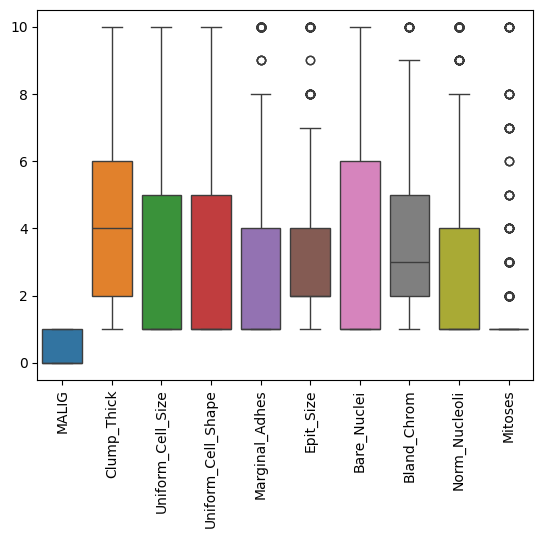

In [10]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [11]:
#some outliers, but these may still be indicators of malignancy
#also not a lot of variance in some of the feature columns, 6/9 have their mininmum, 25%, and 50% at 1

In [12]:
df.duplicated().value_counts()

False    449
True     234
Name: count, dtype: int64

In [13]:
#lots of individuals with the same data. Interesting how close this is to the target column class split

In [14]:
corr=df.corr()

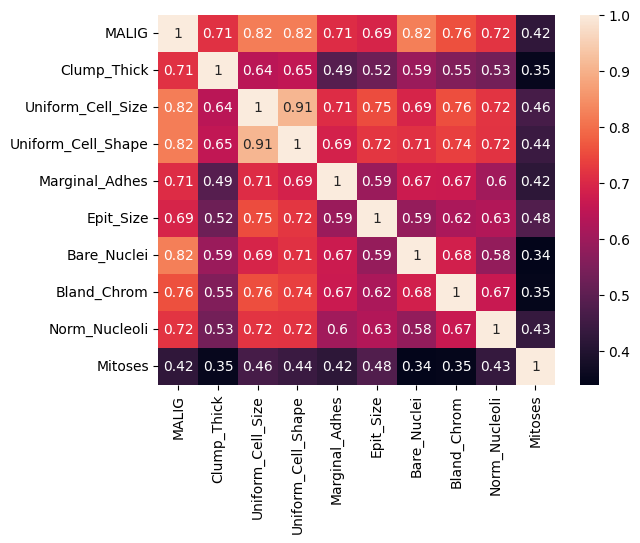

In [15]:
sns.heatmap(data=corr,annot=True);

In [16]:
#interesting that cell shape and size have both a very high correlation to each other and to malignancy

In [17]:
corr2 = df.corr(method='spearman')

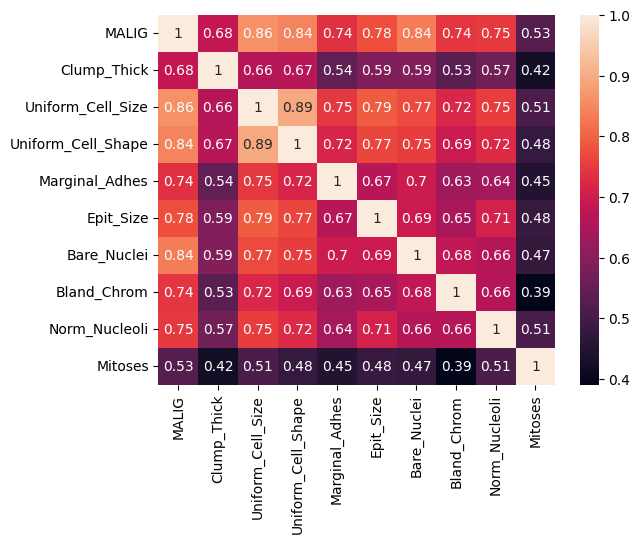

In [18]:
sns.heatmap(data=corr2,annot=True);

In [19]:
#based on the boxplots above, I doubt this data is strictly parametric, so I'll rely on the results from Spearman's correlation

#**Beginning of Clustering Analysis**

In [20]:
#scaling data for clustering algorithm
scaler = StandardScaler()

In [21]:
df_scaled = scaler.fit_transform(df)

In [22]:
#creating a clustering algorithm
kmeans = KMeans(n_clusters=3, max_iter=500)

In [23]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [24]:
#visualizing clusters in scatterplots
df['cluster'] = kmeans.labels_

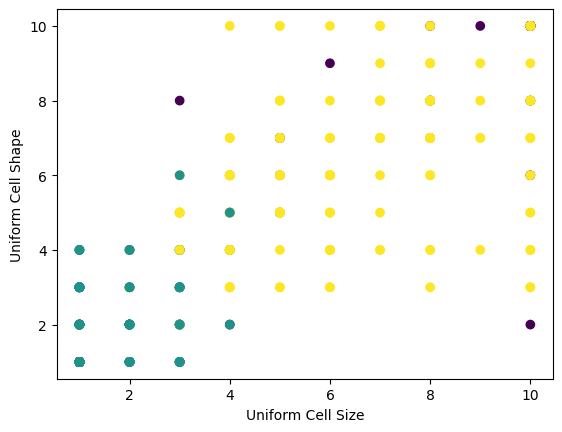

In [25]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

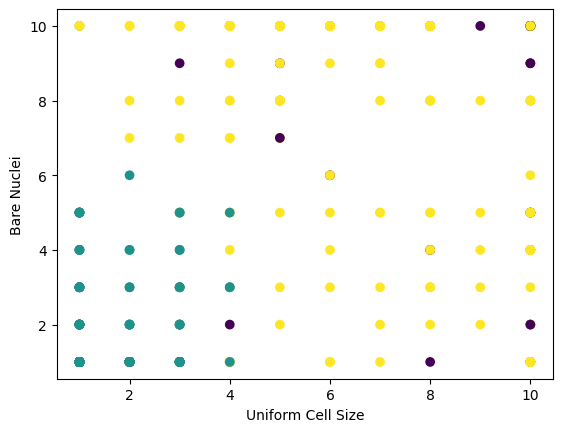

In [26]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

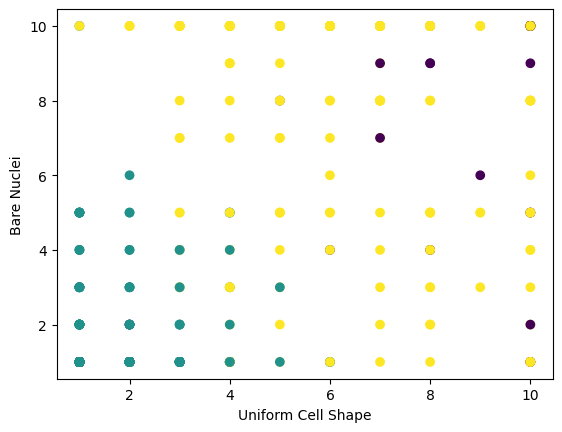

In [27]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [28]:
#making a function to determine ideal # of clusters
ks = range(2,20)
sil = []
inertias = []

for k in ks:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sil.append(silhouette_score(df, km.labels_))
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

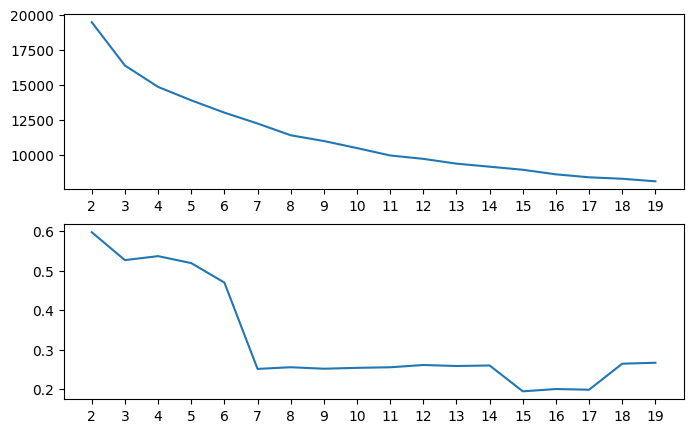

In [29]:
fig, axes = plt.subplots(2,1, figsize=(8,5))
axes[0].plot(ks, inertias)
axes[1].plot(ks, sil)
axes[0].set_xticks(ks)
axes[1].set_xticks(ks);
#looks like 6 clusters is a good number

In [30]:
#reclustering with ideal number of clusters
kmeans = KMeans(n_clusters=6, max_iter=500)

In [31]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=6)

In [32]:
df['cluster'] = kmeans.labels_

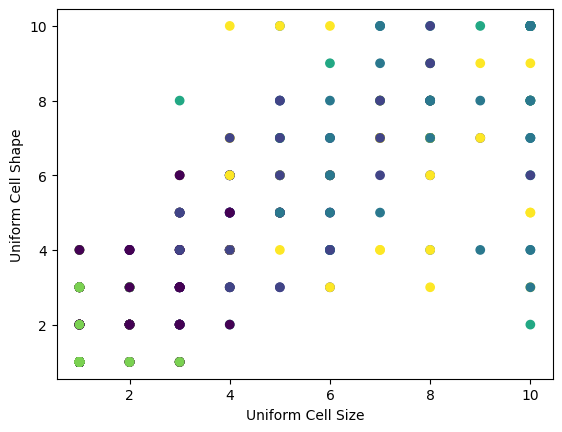

In [33]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

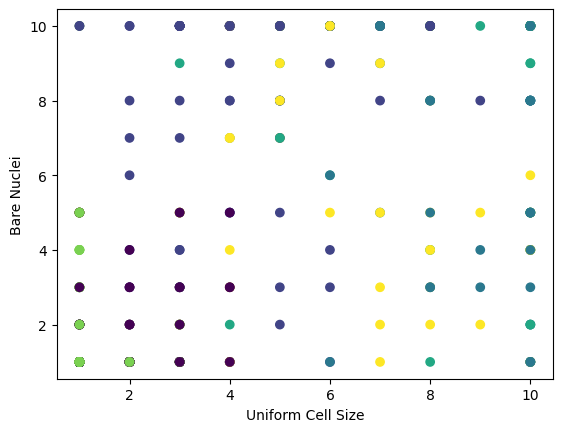

In [34]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

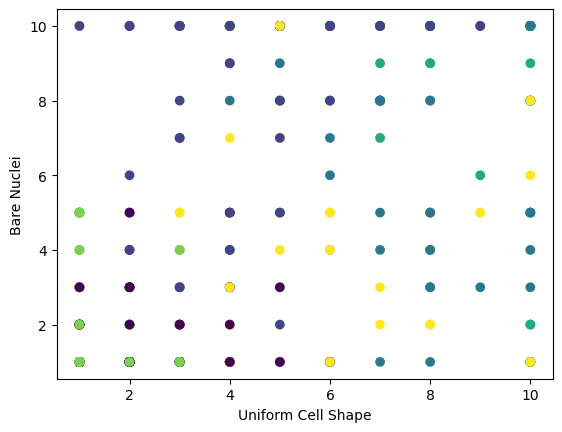

In [35]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [36]:
#scatterplots were not revealing so let's try a groupby and some other data viz to see if we can identify trends in clusters

In [37]:
clusters = df.groupby(['cluster']).mean().reset_index()

In [38]:
clusters.value_counts()

cluster  MALIG     Clump_Thick  Uniform_Cell_Size  Uniform_Cell_Shape  Marginal_Adhes  Epit_Size  Bare_Nuclei  Bland_Chrom  Norm_Nucleoli  Mitoses 
0        0.005650  4.604520     1.423729           1.604520            1.564972        2.192090   1.259887     2.107345     1.423729       1.033898    1
1        0.943182  6.920455     4.420455           4.750000            4.545455        3.806818   8.170455     4.750000     2.931818       1.647727    1
2        1.000000  6.708861     8.417722           8.075949            7.278481        6.797468   7.962025     7.189873     6.708861       1.873418    1
3        1.000000  7.733333     8.300000           8.266667            7.133333        7.366667   7.433333     6.666667     7.766667       8.566667    1
4        0.000000  1.781609     1.111111           1.180077            1.141762        1.977011   1.256705     2.007663     1.065134       1.076628    1
5        0.958333  7.979167     6.395833           6.250000            3.520833        

In [39]:
#groupby looks promising

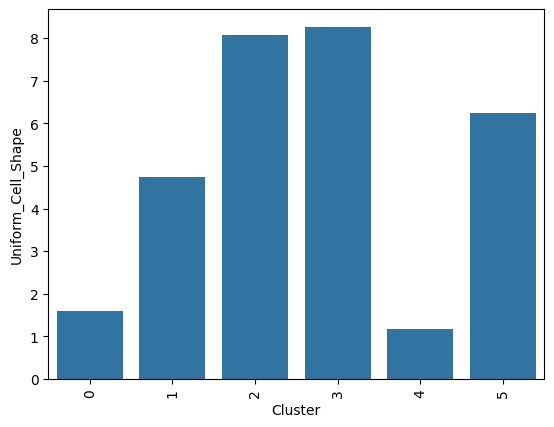

In [40]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Shape'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

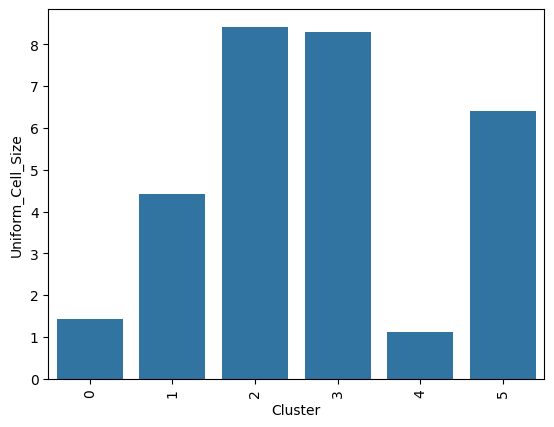

In [41]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Size'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

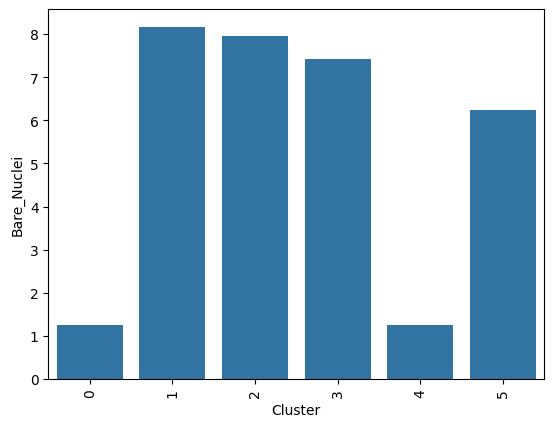

In [42]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bare_Nuclei'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

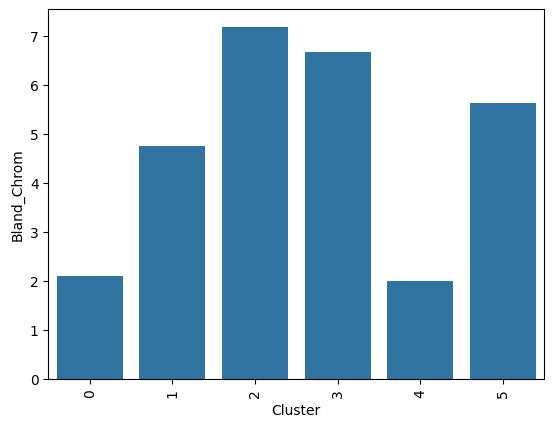

In [43]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bland_Chrom'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

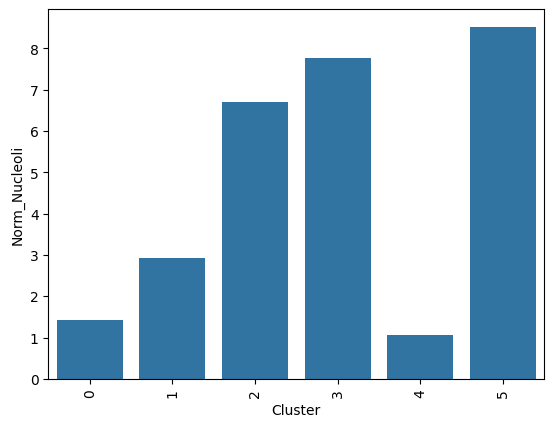

In [44]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Norm_Nucleoli'])
plt.xticks(rotation=90)
plt.xlabel('Cluster');

In [45]:
#trends area little clearer when visualizing a groupby in bar graphs

#**Beginning of Classification Modeling**

In [46]:
#separating out target column
X = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses']]
y = df['MALIG']

In [47]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#exploring train dataframe
X_train.shape

(512, 9)

In [ ]:
X_train.describe()

,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,4.408203,3.123047,3.234375,2.800781,3.212891,3.500000,3.341797,2.769531,1.564453
std,2.784387,3.068446,3.054583,2.830391,2.200247,3.630702,2.363778,2.957231,1.637305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.250000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_preds = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.98      0.91      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#very high f score without scaling. I'll try a boosted model as well with the goal of increasing recall of the positive class

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_preds = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#boosted model showed slightly lower overall accuracy, and lower recall for the positive target class

In [94]:
rf2 = RandomForestClassifier(n_estimators=500,max_depth=2)

In [95]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=500)

In [96]:
rf2_preds = rf2.predict(X_test)

In [97]:
print(classification_report(y_test,rf2_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.97      0.93      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#hypertuning resulted in higher recall of the positive class from reducing the max_depth

In [98]:
xgb2 = XGBClassifier(max_depth=3)

In [99]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
xgb2_preds = xgb2.predict(X_test)

In [101]:
print(classification_report(y_test,xgb2_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.98      0.90      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#commented out to try later if needed.
#scaler=StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)